<div style="width: 30%; float: right; margin: 10px; margin-right: 5%;">
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d3/FHNW_Logo.svg/2560px-FHNW_Logo.svg.png" width="500" style="float: left; filter: invert(50%);"/>
</div>

<h1 style="text-align: left; margin-top: 10px; float: left; width: 60%;">
    Soziale Netzwerke Analysieren Projekt:<br> Raumsonden & Himmelskörper
</h1>

<p style="clear: both; text-align: left;">
    Bearbeitet durch Flurina Riner, Patrick Schürmann, Si Ben Tran im HS 2023.<br>Bachelor of Science FHNW in Data Science.
</p>

# Projektbeschreibung

# Libraries

In [1]:
# Reload modules
%load_ext autoreload
%autoreload 2

# import os
import os
os.chdir('..')

# Data manipulation
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Network
import networkx as nx

# Data preparation
from data.raumsonden.data_pipeline import generate_xlsx_for_gephi
generate_xlsx_for_gephi()

# Datenbeschaffung 

Die Daten, an denen wir arbeiten, sind auf Wikipedia unter folgendem Link verfügbar: https://de.wikipedia.org/wiki/Liste_der_Raumsonden    
Wir haben festgestellt, dass die automatische Datenverarbeitung in Python deutlich aufwändiger ist als die manuelle Bearbeitung.   
Aus diesem Grund haben wir die Tabelle von Wikipedia kopiert und in eine Excel-Liste eingefügt und bearbeitet, die unter dem Pfad data/Liste_Raumsonden.xlsx zu finden ist.

Für Gephi wurde eine Datenpipelin erstellt, welches die Kanten und Knoten in eine xlsx. Format abspeichert und diese dann in Gephi importiert werden kann.   
Hier in diesem Notebook führen wir die Analysen mit der Library NetworkX durch und versuchen Parallel mit Gephi gemeinsam das Soziale Netzwerk zu analysieren.

In [2]:
# Generate xlsx for gephi
generate_xlsx_for_gephi()

# Daten einlesen für Networkx
df = pd.read_excel("data/raumsonden/Liste_Raumsonden.xlsx", sheet_name="Liste_Raumsonden")
df

,Nation oder,Name der Sonde,Typ,Missonsname/,Von,Bis,Status,Missionsziele
0,Sowjetunion,Lunik 1958A,Impaktor,Lunik,1958,1958,Erd(-orbit) nie verlassen,Erdmond
1,Sowjetunion,Lunik 1,Impaktor,Lunik,1959,1959,Beendet,Erdmond
2,Sowjetunion,Lunik 1959A,Impaktor,Lunik,1959,1959,Erd(-orbit) nie verlassen,Erdmond
3,Sowjetunion,Lunik 2,Impaktor,Lunik,1959,1959,Beendet,Erdmond
4,Sowjetunion,Lunik 3,Flyby-Sonde,Lunik,1959,1959,Beendet,Erdmond
...,...,...,...,...,...,...,...,...
262,Israel,Beresheet,Orbiter,unbekannt,2019,2019,Beendet,Erdmond
263,Israel,Beresheet 2,Orbiter,unbekannt,2024,–,Geplant,Erdmond
264,"Israel, Deutschland",LSAS,Lander,Israel Aerospace Industries in Kooperation mit...,2025,–,Geplant,Erdmond
265,Vereinigte Arabische Emirate,al-Amal,Orbiter,unbekannt,2020,–,Aktiv,Mars


# Datenverarbeitung 

Als Knoten betrachten wir Raumsonden und Himmelskörper.   
Himmelskörper sind die Planeten, Asteroiden, Kometen und Monde. 
Diese sind in der letzten Spalte namens Missionsziele in unserem Datensatz aufgeführt.

Als Raumsonde betrachten wir den restlichen Teil unserer Daten.   

Die Kanten sind die Verbindungen zwischen den Raumsonden und den Himmelskörpern.

# Explorative Datenanalyse

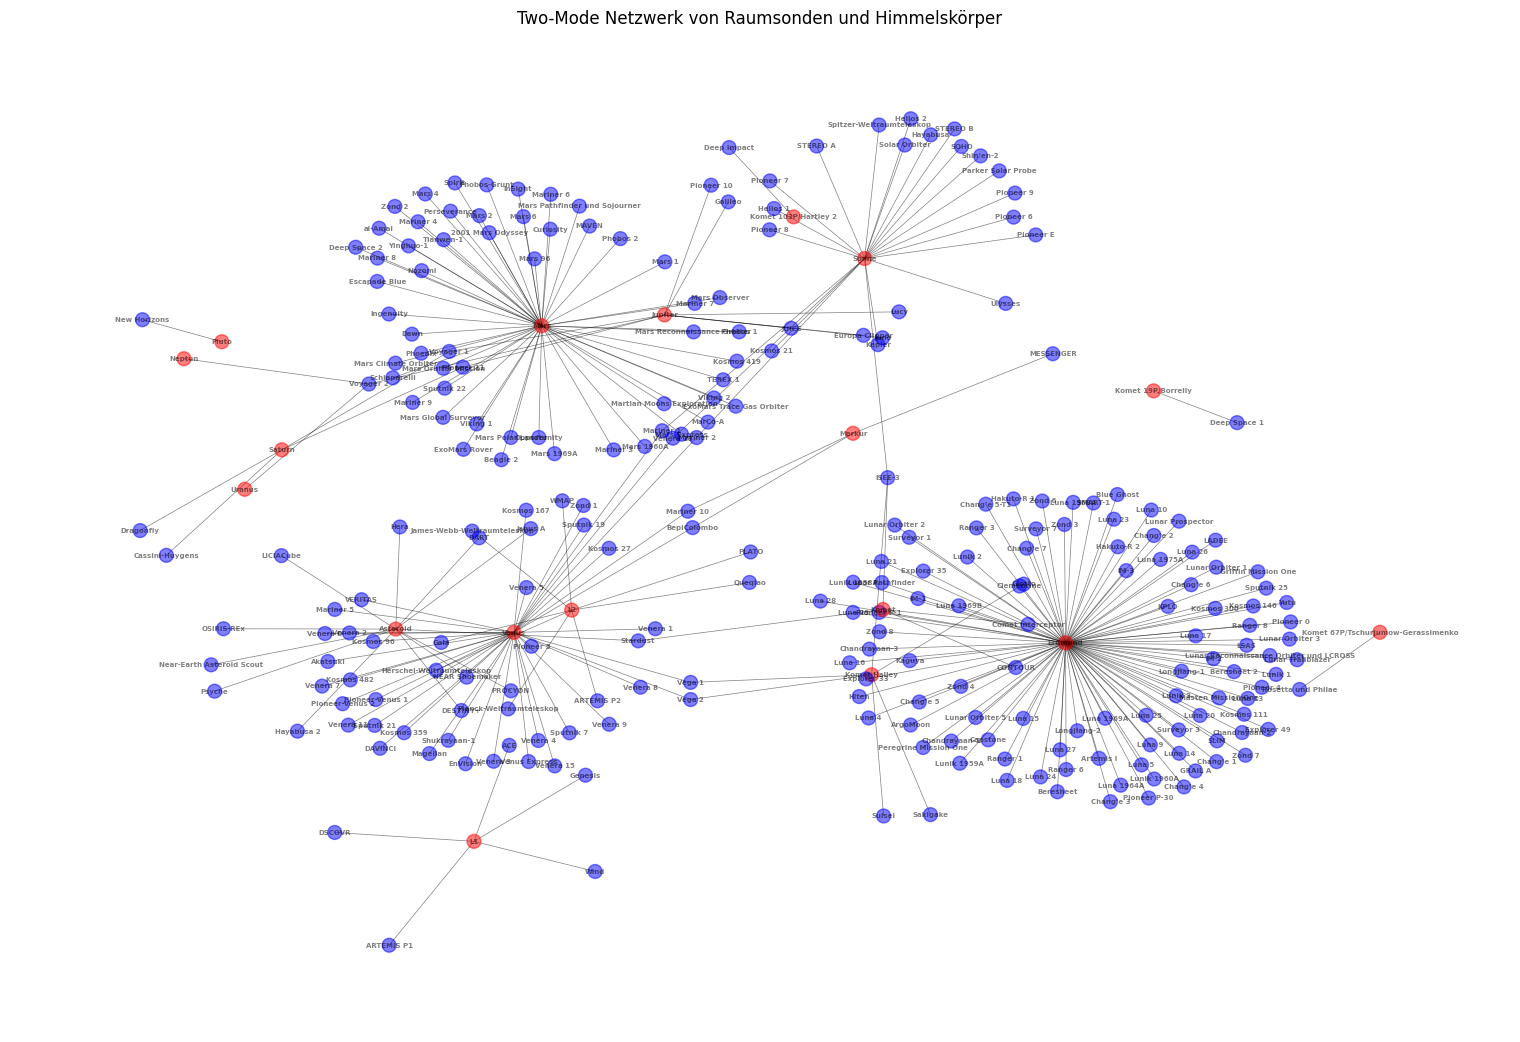

In [3]:
# Figure 
plt.figure(figsize=(15, 10))
# Netzwerkdiagramm erstellen
G = nx.Graph()

# Knoten hinzufügen
for index, row in df.iterrows():
    G.add_node(row['Name der Sonde'], type='Sonde')
    G.add_node(row['Missionsziele'], type='Himmelskörper')

    # Kanten hinzufügen mit der Sonde und dem Himmelskörper als Knoten
    G.add_edge(row['Name der Sonde'], row['Missionsziele'])

# Knotenfarben setzen, je nach Typ
colors = ['blue' if G.nodes[node]['type']=='Sonde' else 'red' for node in G.nodes]

# Netzwerkdiagramm zeichnen
nx.draw(G, 
        with_labels=True, 
        node_color=colors, 
        node_size=100, 
        edge_color='black', 
        font_size=5, 
        font_weight='bold',
        alpha=0.5,
        width=0.5,
        pos=nx.spring_layout(G, k=0.1, iterations=20)
        )

plt.title("Two-Mode Netzwerk von Raumsonden und Himmelskörper")
plt.show()


In [4]:
# Graph initialisieren
G = nx.Graph()

# Reihenweise durch Dataframe iterieiern
for index, row in df.iterrows():
    # Knoten hinzufügen
    G.add_node(row['Name der Sonde'], type='Sonde')
    G.add_node(row['Missionsziele'], type='Himmelskörper')
    # Kanten hinzufügen mit der Sonde und dem Himmelskörper als Knoten
    G.add_edge(row['Name der Sonde'], row['Missionsziele'])

# Layout festlegen
pos = nx.spring_layout(G)

# Scatterplot initialisieren
node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    opacity=0.8,
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        )
    )
)

# Iteriere durch alle Knoten im G und füge die Positionen dem Scatterplot hinzu
for node in G.nodes:
    x, y = pos[node]
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])
    
    # Wenn der Knoten vom Typ 'Sonde' ist, suche nach zusätzlichen Attributen für den Hover-Text
    if G.nodes[node]['type'] == 'Sonde':
        # finde entsprechene Zeile der Sonde im Dataframe
        row = df[df['Name der Sonde'] == node].iloc[0]
        # Hover text erstellen
        hover_text = (
            f"Name der Sonde: {row['Name der Sonde']}<br>"
            f"Nation oder: {row['Nation oder']}<br>"
            f"Typ: {row['Typ']}<br>"
            f"Missonsname: {row['Missonsname/']}<br>"
            f"Von: {row['Von']}<br>"
            f"Bis: {row['Bis']}<br>"
            f"Status: {row['Status']}"
        )
    else:
        # Wenn der Knoten vom Typ 'Himmelskörper' ist, verwende nur den Namen des Knotens
        hover_text = f"{node} ({G.nodes[node]['type']})"
    
    # Hover tex hinzufügen
    node_trace['text'] += tuple([hover_text])

# Farbe definieren für die Knoten
node_trace['marker']['color'] = ['blue' if G.nodes[node]['type']=='Sonde' else 'red' for node in G.nodes]

# Kanten hinzufügen
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.8, color='black'),
    hoverinfo='none',
    mode='lines'
)

# Iteriere durch alle Kanten im G und füge die Positionen dem Scatterplot hinzu
for edge in G.edges:
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])

# Plot erstellen
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                showlegend=False,
                hovermode='closest',
                margin=dict(b=0, l=0, r=0, t=0),
                xaxis=dict(showgrid=False, zeroline=False),
                yaxis=dict(showgrid=False, zeroline=False))
             )

fig.show()


# Modellierung

# Soziale Netzwerkanalyse

# Ausblick

# Lesson Learned

Flurina:

Patrick:

Ben: 